In [41]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data"

In [42]:
import pandas as pd

In [43]:
# Original data is hold by df
df = pd.read_csv(data_dir + "\\fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [44]:
df.shape

(35887, 3)

In [45]:
df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [46]:
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [48]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


In [49]:
df.emotion.value_counts(normalize=True)

3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64

In [50]:
no_data = sum(df.length.isna())
no_data

0

* Nous constatons que Les données n'ont pas de valeur manquante 
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

<AxesSubplot:ylabel='Frequency'>

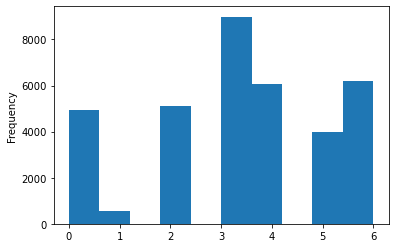

In [51]:
df.emotion.plot.hist()

In [52]:
train_set = df[df.Usage == 'Training'].copy()
train_set.shape

(28709, 4)

In [53]:
train_set.drop(["Usage"], axis=1, inplace=True)
train_set.head()

,emotion,pixels,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,2304


In [54]:
train_set.emotion.value_counts(normalize=True)

3    0.251315
6    0.172942
4    0.168240
2    0.142708
0    0.139155
5    0.110453
1    0.015187
Name: emotion, dtype: float64

<AxesSubplot:ylabel='Frequency'>

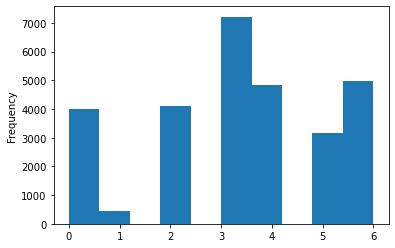

In [55]:
train_set.emotion.plot.hist()

In [56]:
test_set = df[df.Usage == "PrivateTest"].copy()
test_set.shape

(3589, 4)

In [57]:
test_set.drop(['Usage'], axis=1, inplace=True)
test_set.head()

,emotion,pixels,length
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,2304
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,2304
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,2304
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,2304
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,2304


In [58]:
test_set.emotion.value_counts(normalize=True)

3    0.244915
6    0.174422
4    0.165506
2    0.147116
0    0.136807
5    0.115910
1    0.015325
Name: emotion, dtype: float64

<AxesSubplot:ylabel='Frequency'>

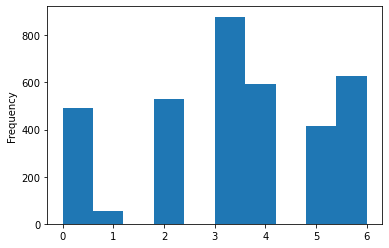

In [59]:
test_set.emotion.plot.hist()

In [60]:
valid_set = df[df.Usage == "PublicTest"].copy()
valid_set.shape

(3589, 4)

In [61]:
valid_set.drop(['Usage'], axis=1, inplace=True)
valid_set.head()

,emotion,pixels,length
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,2304
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,2304
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,2304
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,2304
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,2304


In [62]:
valid_set.emotion.value_counts(normalize=True)

3    0.249373
4    0.181945
6    0.169128
2    0.138200
0    0.130120
5    0.115631
1    0.015603
Name: emotion, dtype: float64

<AxesSubplot:ylabel='Frequency'>

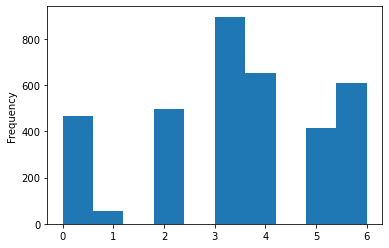

In [63]:
valid_set.emotion.plot.hist()

* On constate que la distribution de catégorie dans les différentes parties sont semblable